# 使用神经网络预测房价

## 导入数据

In [1]:
import numpy as np
import pandas as pd
import time

from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import RobustScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import BatchNormalization,Activation
from keras import optimizers

Using TensorFlow backend.


In [3]:
train = pd.read_csv("../../kaggle/LosAngelesHousePricesForecast/data/train_1.csv")
if 'Unnamed: 0' in train.columns: 
    train = train.drop(['Unnamed: 0'], axis=1)
y = train["SalePrice"]
train1 = train.drop(["Id", "SalePrice"], axis=1)
X = pd.get_dummies(train1).reset_index(drop=True)
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2,random_state = 123)  

In [4]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
318,60,90.000000,9900,7,5,1993,1993,256.0,987,0,...,0,0,0,1,0,0,0,0,1,0
580,20,72.461024,14585,6,6,1960,1987,85.0,594,219,...,0,0,0,1,0,0,0,0,1,0
961,60,66.345460,12227,6,7,1977,1995,424.0,896,0,...,0,0,0,1,0,0,0,0,1,0
78,90,72.000000,10778,4,5,1968,1968,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,50,85.000000,14115,5,5,1993,1995,0.0,732,0,...,0,0,0,1,0,0,0,0,1,0


## 评估函数

In [5]:
def benchmark(model,X_test, y_test):
    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    logrmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(pred)))
    print("RMSE: {} \nLOGRMSE: {}".format(rmse, logrmse))

## 练习一：简单神经网络

In [6]:
def create_model():
    model=Sequential()
    model.add(Dense(10,input_dim=X_train.shape[1],activation='relu'))
    model.add(Dense(300,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam',loss='mean_squared_error')
    return model

### 使用网格搜索

In [7]:
batch_size = [16, 32]
epochs = [500, 1000]

model = model = KerasRegressor(build_fn=create_model)

param_grid = dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=0, cv=5, n_jobs=-1)
result = grid.fit(X_train, y_train)
for mean,stdev,param in zip(result.cv_results_['mean_test_score'],
                           result.cv_results_['std_test_score'],
                           result.cv_results_['params']):
    print("mean:{} stdev:{} param:{}".format(mean,stdev,param))
print("Best score: {} Best param:{}".format(result.best_score_, result.best_params_))

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {EXIT(1)}

In [ ]:
def model_fit(batch_size, epochs, X_train, y_train, X_test):
    model = create_model()

    start_time = time.time()
    history = model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=0)
    end_time = time.time()
    print("Cost time: {} s".format(end_time - start_time))

    benchmark(model,X_test, y_test)
    plt.plot(history.history['loss'])

In [ ]:
# Best score: -985028213.6712328 Best param:{'batch_size': 48, 'epochs': 4000}
batch_size = 48
epochs = 4000
model_fit(batch_size, epochs, X_train, y_train, X_test)

- 通过gridsearch得到最佳参数为'batch_size': 48, 'epochs': 4000；接下来可以固定batch_size在格点搜索4000附近的epochs

In [19]:
batch_size = [48]
epochs = range(4400,5000,100)
# Best score: -1246945380.6027398 Best param:{'batch_size': 48, 'epochs': 4400}
model = KerasRegressor(build_fn=create_model)

param_grid = dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=0, cv=5, n_jobs=-1)
result = grid.fit(X_train, y_train)
for mean,stdev,param in zip(result.cv_results_['mean_test_score'],
                           result.cv_results_['std_test_score'],
                           result.cv_results_['params']):
    print("mean:{} stdev:{} param:{}".format(mean,stdev,param))
print("Best score: {} Best param:{}".format(result.best_score_, result.best_params_))

/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/4800
1168/1168 [==============================] - 1s 438us/step - loss: 38156689267.7260
Epoch 2/4800
1168/1168 [==============================] - 0s 38us/step - loss: 32504440411.1781
Epoch 3/4800
1168/1168 [==============================] - 0s 37us/step - loss: 16386923881.2055
Epoch 4/4800
1168/1168 [==============================] - 0s 38us/step - loss: 7805597091.0685
Epoch 5/4800
1168/1168 [==============================] - 0s 37us/step - loss: 6714897669.2603
Epoch 6/4800
1168/1168 [==============================] - 0s 37us/step - loss: 5680864766.2466
Epoch 7/4800
1168/1168 [==============================] - 0s 38us/step - loss: 5287464177.9726
Epoch 8/4800
1168/1168 [==============================] - 0s 37us/step - loss: 4954664340.1644
Epoch 9/4800
1168/1168 [==============================] - 0s 38us/step - loss: 4361911210.0822
Epoch 10/4800
1168/1168 [==============================] - 0s 37us/step - loss: 4048980078.4658
Epoch 11/4800
1168/1168 [====================

1168/1168 [==============================] - 0s 37us/step - loss: 1217642449.9726
Epoch 171/4800
1168/1168 [==============================] - 0s 37us/step - loss: 1284564442.3014
Epoch 172/4800
1168/1168 [==============================] - 0s 37us/step - loss: 1243831581.8082
Epoch 173/4800
1168/1168 [==============================] - 0s 38us/step - loss: 1279936804.8219
Epoch 174/4800
1168/1168 [==============================] - 0s 38us/step - loss: 1226354858.9589
Epoch 175/4800
1168/1168 [==============================] - 0s 39us/step - loss: 1230334192.2192
Epoch 176/4800
1168/1168 [==============================] - 0s 38us/step - loss: 1286302996.6027
Epoch 177/4800
1168/1168 [==============================] - 0s 38us/step - loss: 1226004310.3562
Epoch 178/4800
1168/1168 [==============================] - 0s 37us/step - loss: 1226640824.9863
Epoch 179/4800
1168/1168 [==============================] - 0s 37us/step - loss: 1191428616.3288
Epoch 180/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 38us/step - loss: 738893052.0548
Epoch 340/4800
1168/1168 [==============================] - 0s 39us/step - loss: 692834280.3288
Epoch 341/4800
1168/1168 [==============================] - 0s 39us/step - loss: 647216174.9041
Epoch 342/4800
1168/1168 [==============================] - 0s 38us/step - loss: 649223441.0959
Epoch 343/4800
1168/1168 [==============================] - 0s 38us/step - loss: 714582050.6301
Epoch 344/4800
1168/1168 [==============================] - 0s 38us/step - loss: 709868932.3836
Epoch 345/4800
1168/1168 [==============================] - 0s 38us/step - loss: 631101863.6712
Epoch 346/4800
1168/1168 [==============================] - 0s 38us/step - loss: 666478732.7123
Epoch 347/4800
1168/1168 [==============================] - 0s 38us/step - loss: 649572715.3973
Epoch 348/4800
1168/1168 [==============================] - 0s 37us/step - loss: 701645870.0274
Epoch 349/4800
1168/1168 [=============================

1168/1168 [==============================] - 0s 37us/step - loss: 713138917.9178
Epoch 510/4800
1168/1168 [==============================] - 0s 37us/step - loss: 627187275.8356
Epoch 511/4800
1168/1168 [==============================] - 0s 37us/step - loss: 533170627.0685
Epoch 512/4800
1168/1168 [==============================] - 0s 38us/step - loss: 512521878.5753
Epoch 513/4800
1168/1168 [==============================] - 0s 38us/step - loss: 472356274.8493
Epoch 514/4800
1168/1168 [==============================] - 0s 37us/step - loss: 506793160.1096
Epoch 515/4800
1168/1168 [==============================] - 0s 36us/step - loss: 500987697.5342
Epoch 516/4800
1168/1168 [==============================] - 0s 37us/step - loss: 478001269.6986
Epoch 517/4800
1168/1168 [==============================] - 0s 37us/step - loss: 526854408.5479
Epoch 518/4800
1168/1168 [==============================] - 0s 38us/step - loss: 476441803.3973
Epoch 519/4800
1168/1168 [=============================

1168/1168 [==============================] - 0s 37us/step - loss: 419751435.1781
Epoch 680/4800
1168/1168 [==============================] - 0s 37us/step - loss: 444317696.0000
Epoch 681/4800
1168/1168 [==============================] - 0s 38us/step - loss: 464916826.7397
Epoch 682/4800
1168/1168 [==============================] - 0s 37us/step - loss: 464335170.6301
Epoch 683/4800
1168/1168 [==============================] - 0s 37us/step - loss: 481206707.7260
Epoch 684/4800
1168/1168 [==============================] - 0s 37us/step - loss: 439468832.8767
Epoch 685/4800
1168/1168 [==============================] - 0s 37us/step - loss: 463502734.0274
Epoch 686/4800
1168/1168 [==============================] - 0s 36us/step - loss: 463306622.4658
Epoch 687/4800
1168/1168 [==============================] - 0s 37us/step - loss: 434950592.2192
Epoch 688/4800
1168/1168 [==============================] - 0s 38us/step - loss: 420930190.6849
Epoch 689/4800
1168/1168 [=============================

1168/1168 [==============================] - 0s 37us/step - loss: 453435350.5753
Epoch 850/4800
1168/1168 [==============================] - 0s 37us/step - loss: 403546617.6438
Epoch 851/4800
1168/1168 [==============================] - 0s 37us/step - loss: 440225590.1370
Epoch 852/4800
1168/1168 [==============================] - 0s 37us/step - loss: 431076656.2192
Epoch 853/4800
1168/1168 [==============================] - 0s 37us/step - loss: 388357157.9178
Epoch 854/4800
1168/1168 [==============================] - 0s 36us/step - loss: 400449702.5753
Epoch 855/4800
1168/1168 [==============================] - 0s 37us/step - loss: 417780788.3836
Epoch 856/4800
1168/1168 [==============================] - 0s 37us/step - loss: 416202691.0685
Epoch 857/4800
1168/1168 [==============================] - 0s 37us/step - loss: 384242867.7260
Epoch 858/4800
1168/1168 [==============================] - 0s 37us/step - loss: 379192365.5890
Epoch 859/4800
1168/1168 [=============================

1168/1168 [==============================] - 0s 38us/step - loss: 375865093.4795
Epoch 1020/4800
1168/1168 [==============================] - 0s 38us/step - loss: 364543315.9452
Epoch 1021/4800
1168/1168 [==============================] - 0s 37us/step - loss: 385435398.1370
Epoch 1022/4800
1168/1168 [==============================] - 0s 38us/step - loss: 375305146.0822
Epoch 1023/4800
1168/1168 [==============================] - 0s 38us/step - loss: 368560715.8356
Epoch 1024/4800
1168/1168 [==============================] - 0s 38us/step - loss: 408685611.8356
Epoch 1025/4800
1168/1168 [==============================] - 0s 38us/step - loss: 368571330.4110
Epoch 1026/4800
1168/1168 [==============================] - 0s 39us/step - loss: 408778218.9589
Epoch 1027/4800
1168/1168 [==============================] - 0s 38us/step - loss: 422041704.2192
Epoch 1028/4800
1168/1168 [==============================] - 0s 38us/step - loss: 374622581.0411
Epoch 1029/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 38us/step - loss: 353733360.4384
Epoch 1188/4800
1168/1168 [==============================] - 0s 38us/step - loss: 347441448.7671
Epoch 1189/4800
1168/1168 [==============================] - 0s 37us/step - loss: 401251326.9041
Epoch 1190/4800
1168/1168 [==============================] - 0s 37us/step - loss: 340335671.4521
Epoch 1191/4800
1168/1168 [==============================] - 0s 36us/step - loss: 366982353.3151
Epoch 1192/4800
1168/1168 [==============================] - 0s 38us/step - loss: 412954922.9589
Epoch 1193/4800
1168/1168 [==============================] - 0s 37us/step - loss: 432019837.3699
Epoch 1194/4800
1168/1168 [==============================] - 0s 38us/step - loss: 349543026.6301
Epoch 1195/4800
1168/1168 [==============================] - 0s 38us/step - loss: 417288572.4932
Epoch 1196/4800
1168/1168 [==============================] - 0s 37us/step - loss: 367009728.4384
Epoch 1197/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 38us/step - loss: 347511441.7534
Epoch 1356/4800
1168/1168 [==============================] - 0s 38us/step - loss: 328023842.8493
Epoch 1357/4800
1168/1168 [==============================] - 0s 38us/step - loss: 354954330.0822
Epoch 1358/4800
1168/1168 [==============================] - 0s 41us/step - loss: 384899769.4247
Epoch 1359/4800
1168/1168 [==============================] - 0s 38us/step - loss: 330339933.8082
Epoch 1360/4800
1168/1168 [==============================] - 0s 38us/step - loss: 408583033.2055
Epoch 1361/4800
1168/1168 [==============================] - 0s 38us/step - loss: 339445513.2055
Epoch 1362/4800
1168/1168 [==============================] - 0s 38us/step - loss: 334991270.1370
Epoch 1363/4800
1168/1168 [==============================] - 0s 38us/step - loss: 339057622.1370
Epoch 1364/4800
1168/1168 [==============================] - 0s 38us/step - loss: 410200640.8767
Epoch 1365/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 307033932.2740
Epoch 1524/4800
1168/1168 [==============================] - 0s 37us/step - loss: 327870887.2329
Epoch 1525/4800
1168/1168 [==============================] - 0s 37us/step - loss: 312937327.3425
Epoch 1526/4800
1168/1168 [==============================] - 0s 37us/step - loss: 315082224.2192
Epoch 1527/4800
1168/1168 [==============================] - 0s 37us/step - loss: 331353079.0137
Epoch 1528/4800
1168/1168 [==============================] - 0s 41us/step - loss: 305418311.7808
Epoch 1529/4800
1168/1168 [==============================] - 0s 38us/step - loss: 336956504.6575
Epoch 1530/4800
1168/1168 [==============================] - 0s 38us/step - loss: 304052528.7671
Epoch 1531/4800
1168/1168 [==============================] - 0s 37us/step - loss: 400426909.3699
Epoch 1532/4800
1168/1168 [==============================] - 0s 38us/step - loss: 348601645.3699
Epoch 1533/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 38us/step - loss: 351282663.4521
Epoch 1692/4800
1168/1168 [==============================] - 0s 39us/step - loss: 326743243.7260
Epoch 1693/4800
1168/1168 [==============================] - 0s 38us/step - loss: 352959243.3973
Epoch 1694/4800
1168/1168 [==============================] - 0s 37us/step - loss: 325107585.5342
Epoch 1695/4800
1168/1168 [==============================] - 0s 38us/step - loss: 305089261.9178
Epoch 1696/4800
1168/1168 [==============================] - 0s 37us/step - loss: 304221928.5479
Epoch 1697/4800
1168/1168 [==============================] - 0s 38us/step - loss: 357392879.3425
Epoch 1698/4800
1168/1168 [==============================] - 0s 39us/step - loss: 316146891.8356
Epoch 1699/4800
1168/1168 [==============================] - 0s 38us/step - loss: 285962825.8630
Epoch 1700/4800
1168/1168 [==============================] - 0s 38us/step - loss: 339073529.6438
Epoch 1701/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 306585998.2466
Epoch 1860/4800
1168/1168 [==============================] - 0s 38us/step - loss: 300880504.3288
Epoch 1861/4800
1168/1168 [==============================] - 0s 38us/step - loss: 280179348.8219
Epoch 1862/4800
1168/1168 [==============================] - 0s 37us/step - loss: 416002495.2329
Epoch 1863/4800
1168/1168 [==============================] - 0s 38us/step - loss: 333827410.6301
Epoch 1864/4800
1168/1168 [==============================] - 0s 37us/step - loss: 369520312.1096
Epoch 1865/4800
1168/1168 [==============================] - 0s 38us/step - loss: 320582412.7123
Epoch 1866/4800
1168/1168 [==============================] - 0s 38us/step - loss: 278923822.0274
Epoch 1867/4800
1168/1168 [==============================] - 0s 37us/step - loss: 313697486.6849
Epoch 1868/4800
1168/1168 [==============================] - 0s 38us/step - loss: 317052892.7123
Epoch 1869/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 297203960.1096
Epoch 2028/4800
1168/1168 [==============================] - 0s 37us/step - loss: 269638150.5753
Epoch 2029/4800
1168/1168 [==============================] - 0s 36us/step - loss: 314391861.4795
Epoch 2030/4800
1168/1168 [==============================] - 0s 38us/step - loss: 339043644.2740
Epoch 2031/4800
1168/1168 [==============================] - 0s 37us/step - loss: 278066559.4521
Epoch 2032/4800
1168/1168 [==============================] - 0s 36us/step - loss: 312794135.7808
Epoch 2033/4800
1168/1168 [==============================] - 0s 36us/step - loss: 334196796.9315
Epoch 2034/4800
1168/1168 [==============================] - 0s 38us/step - loss: 297813086.7945
Epoch 2035/4800
1168/1168 [==============================] - 0s 38us/step - loss: 295600263.2329
Epoch 2036/4800
1168/1168 [==============================] - 0s 37us/step - loss: 278326063.7808
Epoch 2037/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 38us/step - loss: 279020327.5616
Epoch 2196/4800
1168/1168 [==============================] - 0s 38us/step - loss: 305558607.5616
Epoch 2197/4800
1168/1168 [==============================] - 0s 40us/step - loss: 324679079.0137
Epoch 2198/4800
1168/1168 [==============================] - 0s 37us/step - loss: 292076038.5753
Epoch 2199/4800
1168/1168 [==============================] - 0s 38us/step - loss: 303388136.5479
Epoch 2200/4800
1168/1168 [==============================] - 0s 38us/step - loss: 247068499.2877
Epoch 2201/4800
1168/1168 [==============================] - 0s 38us/step - loss: 280890949.2603
Epoch 2202/4800
1168/1168 [==============================] - 0s 38us/step - loss: 272355679.7808
Epoch 2203/4800
1168/1168 [==============================] - 0s 38us/step - loss: 331226752.2192
Epoch 2204/4800
1168/1168 [==============================] - 0s 38us/step - loss: 270495416.2192
Epoch 2205/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 284481075.5068
Epoch 2364/4800
1168/1168 [==============================] - 0s 37us/step - loss: 239509799.0137
Epoch 2365/4800
1168/1168 [==============================] - 0s 37us/step - loss: 266219535.1233
Epoch 2366/4800
1168/1168 [==============================] - 0s 37us/step - loss: 288380317.8082
Epoch 2367/4800
1168/1168 [==============================] - 0s 37us/step - loss: 270482806.1370
Epoch 2368/4800
1168/1168 [==============================] - 0s 37us/step - loss: 285548875.6164
Epoch 2369/4800
1168/1168 [==============================] - 0s 37us/step - loss: 255607859.5068
Epoch 2370/4800
1168/1168 [==============================] - 0s 37us/step - loss: 259989299.0685
Epoch 2371/4800
1168/1168 [==============================] - 0s 37us/step - loss: 318736996.8219
Epoch 2372/4800
1168/1168 [==============================] - 0s 37us/step - loss: 302306417.7534
Epoch 2373/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 316355318.1370
Epoch 2532/4800
1168/1168 [==============================] - 0s 37us/step - loss: 335912887.8904
Epoch 2533/4800
1168/1168 [==============================] - 0s 36us/step - loss: 276288067.9452
Epoch 2534/4800
1168/1168 [==============================] - 0s 37us/step - loss: 277968334.0274
Epoch 2535/4800
1168/1168 [==============================] - 0s 37us/step - loss: 255867742.2466
Epoch 2536/4800
1168/1168 [==============================] - 0s 38us/step - loss: 325631941.6986
Epoch 2537/4800
1168/1168 [==============================] - 0s 38us/step - loss: 249139363.7260
Epoch 2538/4800
1168/1168 [==============================] - 0s 38us/step - loss: 252978752.4384
Epoch 2539/4800
1168/1168 [==============================] - 0s 38us/step - loss: 259548983.0137
Epoch 2540/4800
1168/1168 [==============================] - 0s 37us/step - loss: 285726148.6027
Epoch 2541/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 38us/step - loss: 357621157.6986
Epoch 2700/4800
1168/1168 [==============================] - 0s 37us/step - loss: 293659650.3014
Epoch 2701/4800
1168/1168 [==============================] - 0s 40us/step - loss: 284636546.8493
Epoch 2702/4800
1168/1168 [==============================] - 0s 38us/step - loss: 275254287.5616
Epoch 2703/4800
1168/1168 [==============================] - 0s 38us/step - loss: 266914032.4384
Epoch 2704/4800
1168/1168 [==============================] - 0s 37us/step - loss: 315215501.8082
Epoch 2705/4800
1168/1168 [==============================] - 0s 38us/step - loss: 260277029.2603
Epoch 2706/4800
1168/1168 [==============================] - 0s 37us/step - loss: 308086925.5890
Epoch 2707/4800
1168/1168 [==============================] - 0s 37us/step - loss: 261796186.4110
Epoch 2708/4800
1168/1168 [==============================] - 0s 37us/step - loss: 271676811.3973
Epoch 2709/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 233545526.9041
Epoch 2868/4800
1168/1168 [==============================] - 0s 37us/step - loss: 264654446.6849
Epoch 2869/4800
1168/1168 [==============================] - 0s 37us/step - loss: 282630456.3288
Epoch 2870/4800
1168/1168 [==============================] - 0s 38us/step - loss: 266793879.3425
Epoch 2871/4800
1168/1168 [==============================] - 0s 37us/step - loss: 291650685.4795
Epoch 2872/4800
1168/1168 [==============================] - 0s 37us/step - loss: 254490902.1370
Epoch 2873/4800
1168/1168 [==============================] - 0s 37us/step - loss: 245098794.5205
Epoch 2874/4800
1168/1168 [==============================] - 0s 37us/step - loss: 246025370.5205
Epoch 2875/4800
1168/1168 [==============================] - 0s 37us/step - loss: 253041118.2466
Epoch 2876/4800
1168/1168 [==============================] - 0s 38us/step - loss: 422951683.7260
Epoch 2877/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 268729791.6712
Epoch 3036/4800
1168/1168 [==============================] - 0s 38us/step - loss: 239952127.4521
Epoch 3037/4800
1168/1168 [==============================] - 0s 37us/step - loss: 272722900.1644
Epoch 3038/4800
1168/1168 [==============================] - 0s 37us/step - loss: 279013095.8904
Epoch 3039/4800
1168/1168 [==============================] - 0s 38us/step - loss: 234036259.0685
Epoch 3040/4800
1168/1168 [==============================] - 0s 37us/step - loss: 250357188.0548
Epoch 3041/4800
1168/1168 [==============================] - 0s 37us/step - loss: 230491457.6438
Epoch 3042/4800
1168/1168 [==============================] - 0s 37us/step - loss: 237274084.3836
Epoch 3043/4800
1168/1168 [==============================] - 0s 44us/step - loss: 310048393.4247
Epoch 3044/4800
1168/1168 [==============================] - 0s 40us/step - loss: 290336615.2329
Epoch 3045/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 38us/step - loss: 227415477.4795
Epoch 3204/4800
1168/1168 [==============================] - 0s 38us/step - loss: 235417295.1233
Epoch 3205/4800
1168/1168 [==============================] - 0s 37us/step - loss: 269777310.0274
Epoch 3206/4800
1168/1168 [==============================] - 0s 38us/step - loss: 243823804.2740
Epoch 3207/4800
1168/1168 [==============================] - 0s 38us/step - loss: 255800881.8630
Epoch 3208/4800
1168/1168 [==============================] - 0s 38us/step - loss: 241292857.8630
Epoch 3209/4800
1168/1168 [==============================] - 0s 37us/step - loss: 237361875.2877
Epoch 3210/4800
1168/1168 [==============================] - 0s 37us/step - loss: 230983531.1781
Epoch 3211/4800
1168/1168 [==============================] - 0s 38us/step - loss: 248479480.3288
Epoch 3212/4800
1168/1168 [==============================] - 0s 38us/step - loss: 258568186.5205
Epoch 3213/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 241570907.0685
Epoch 3372/4800
1168/1168 [==============================] - 0s 37us/step - loss: 269784328.6575
Epoch 3373/4800
1168/1168 [==============================] - 0s 37us/step - loss: 254243721.8630
Epoch 3374/4800
1168/1168 [==============================] - 0s 37us/step - loss: 274660672.2192
Epoch 3375/4800
1168/1168 [==============================] - 0s 36us/step - loss: 263226196.9315
Epoch 3376/4800
1168/1168 [==============================] - 0s 37us/step - loss: 220123568.6575
Epoch 3377/4800
1168/1168 [==============================] - 0s 37us/step - loss: 242855062.3562
Epoch 3378/4800
1168/1168 [==============================] - 0s 36us/step - loss: 286065083.3973
Epoch 3379/4800
1168/1168 [==============================] - 0s 37us/step - loss: 325034630.5753
Epoch 3380/4800
1168/1168 [==============================] - 0s 37us/step - loss: 314051506.5205
Epoch 3381/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 221066782.5753
Epoch 3540/4800
1168/1168 [==============================] - 0s 38us/step - loss: 255632544.8767
Epoch 3541/4800
1168/1168 [==============================] - 0s 38us/step - loss: 258430411.2877
Epoch 3542/4800
1168/1168 [==============================] - 0s 37us/step - loss: 241856323.9452
Epoch 3543/4800
1168/1168 [==============================] - 0s 38us/step - loss: 260851192.5479
Epoch 3544/4800
1168/1168 [==============================] - 0s 37us/step - loss: 236177922.7397
Epoch 3545/4800
1168/1168 [==============================] - 0s 37us/step - loss: 262632112.4384
Epoch 3546/4800
1168/1168 [==============================] - 0s 37us/step - loss: 248766464.4384
Epoch 3547/4800
1168/1168 [==============================] - 0s 36us/step - loss: 249521822.0274
Epoch 3548/4800
1168/1168 [==============================] - 0s 37us/step - loss: 230525311.0137
Epoch 3549/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 239148005.6986
Epoch 3708/4800
1168/1168 [==============================] - 0s 37us/step - loss: 227746353.6438
Epoch 3709/4800
1168/1168 [==============================] - 0s 37us/step - loss: 243974416.1096
Epoch 3710/4800
1168/1168 [==============================] - 0s 37us/step - loss: 222919914.7397
Epoch 3711/4800
1168/1168 [==============================] - 0s 36us/step - loss: 232608216.3288
Epoch 3712/4800
1168/1168 [==============================] - 0s 37us/step - loss: 219831260.4932
Epoch 3713/4800
1168/1168 [==============================] - 0s 37us/step - loss: 225907275.5068
Epoch 3714/4800
1168/1168 [==============================] - 0s 37us/step - loss: 246095622.5753
Epoch 3715/4800
1168/1168 [==============================] - 0s 37us/step - loss: 230864597.6986
Epoch 3716/4800
1168/1168 [==============================] - 0s 38us/step - loss: 226329503.3425
Epoch 3717/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 221918537.2055
Epoch 3876/4800
1168/1168 [==============================] - 0s 37us/step - loss: 224495694.1370
Epoch 3877/4800
1168/1168 [==============================] - 0s 37us/step - loss: 251902113.9726
Epoch 3878/4800
1168/1168 [==============================] - 0s 36us/step - loss: 208467346.8493
Epoch 3879/4800
1168/1168 [==============================] - 0s 36us/step - loss: 290780433.9726
Epoch 3880/4800
1168/1168 [==============================] - 0s 37us/step - loss: 224706147.6164
Epoch 3881/4800
1168/1168 [==============================] - 0s 37us/step - loss: 264524934.0274
Epoch 3882/4800
1168/1168 [==============================] - 0s 37us/step - loss: 242061824.6575
Epoch 3883/4800
1168/1168 [==============================] - 0s 36us/step - loss: 242280534.7945
Epoch 3884/4800
1168/1168 [==============================] - 0s 37us/step - loss: 233726259.5068
Epoch 3885/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 217518890.9589
Epoch 4044/4800
1168/1168 [==============================] - 0s 36us/step - loss: 219078639.6712
Epoch 4045/4800
1168/1168 [==============================] - 0s 37us/step - loss: 252310558.2466
Epoch 4046/4800
1168/1168 [==============================] - 0s 37us/step - loss: 286219007.3425
Epoch 4047/4800
1168/1168 [==============================] - 0s 37us/step - loss: 267430456.0000
Epoch 4048/4800
1168/1168 [==============================] - 0s 37us/step - loss: 215298256.4384
Epoch 4049/4800
1168/1168 [==============================] - 0s 37us/step - loss: 226818062.1370
Epoch 4050/4800
1168/1168 [==============================] - 0s 37us/step - loss: 219521764.8219
Epoch 4051/4800
1168/1168 [==============================] - 0s 38us/step - loss: 225405493.3699
Epoch 4052/4800
1168/1168 [==============================] - 0s 38us/step - loss: 231168883.6164
Epoch 4053/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 38us/step - loss: 234282322.7397
Epoch 4212/4800
1168/1168 [==============================] - 0s 38us/step - loss: 225966212.4932
Epoch 4213/4800
1168/1168 [==============================] - 0s 37us/step - loss: 210134578.8493
Epoch 4214/4800
1168/1168 [==============================] - 0s 38us/step - loss: 231855900.7123
Epoch 4215/4800
1168/1168 [==============================] - 0s 37us/step - loss: 217226760.4384
Epoch 4216/4800
1168/1168 [==============================] - 0s 37us/step - loss: 267891966.5753
Epoch 4217/4800
1168/1168 [==============================] - 0s 38us/step - loss: 201795166.7945
Epoch 4218/4800
1168/1168 [==============================] - 0s 37us/step - loss: 205491818.9589
Epoch 4219/4800
1168/1168 [==============================] - 0s 37us/step - loss: 202601032.2192
Epoch 4220/4800
1168/1168 [==============================] - 0s 37us/step - loss: 224226905.4247
Epoch 4221/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 229056521.2055
Epoch 4380/4800
1168/1168 [==============================] - 0s 38us/step - loss: 242843513.4247
Epoch 4381/4800
1168/1168 [==============================] - 0s 37us/step - loss: 239566470.4658
Epoch 4382/4800
1168/1168 [==============================] - 0s 36us/step - loss: 219196664.4384
Epoch 4383/4800
1168/1168 [==============================] - 0s 37us/step - loss: 245657875.9452
Epoch 4384/4800
1168/1168 [==============================] - 0s 37us/step - loss: 232472533.6986
Epoch 4385/4800
1168/1168 [==============================] - 0s 37us/step - loss: 218472113.5342
Epoch 4386/4800
1168/1168 [==============================] - 0s 37us/step - loss: 232836800.9863
Epoch 4387/4800
1168/1168 [==============================] - 0s 37us/step - loss: 240253287.2329
Epoch 4388/4800
1168/1168 [==============================] - 0s 37us/step - loss: 227459822.6849
Epoch 4389/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 224710195.5068
Epoch 4548/4800
1168/1168 [==============================] - 0s 37us/step - loss: 227292499.2877
Epoch 4549/4800
1168/1168 [==============================] - 0s 36us/step - loss: 250675022.1370
Epoch 4550/4800
1168/1168 [==============================] - 0s 38us/step - loss: 283670151.6712
Epoch 4551/4800
1168/1168 [==============================] - 0s 37us/step - loss: 235733977.7534
Epoch 4552/4800
1168/1168 [==============================] - 0s 37us/step - loss: 206082579.3973
Epoch 4553/4800
1168/1168 [==============================] - 0s 38us/step - loss: 209125460.8219
Epoch 4554/4800
1168/1168 [==============================] - 0s 37us/step - loss: 243920196.2740
Epoch 4555/4800
1168/1168 [==============================] - 0s 38us/step - loss: 220636552.3288
Epoch 4556/4800
1168/1168 [==============================] - 0s 37us/step - loss: 245647837.5890
Epoch 4557/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 38us/step - loss: 211461181.1507
Epoch 4716/4800
1168/1168 [==============================] - 0s 38us/step - loss: 196046263.3425
Epoch 4717/4800
1168/1168 [==============================] - 0s 38us/step - loss: 212574380.0548
Epoch 4718/4800
1168/1168 [==============================] - 0s 36us/step - loss: 217121733.9178
Epoch 4719/4800
1168/1168 [==============================] - 0s 37us/step - loss: 212071687.4521
Epoch 4720/4800
1168/1168 [==============================] - 0s 37us/step - loss: 206043232.1096
Epoch 4721/4800
1168/1168 [==============================] - 0s 37us/step - loss: 250087272.8767
Epoch 4722/4800
1168/1168 [==============================] - 0s 38us/step - loss: 231062746.0822
Epoch 4723/4800
1168/1168 [==============================] - 0s 37us/step - loss: 225527771.9452
Epoch 4724/4800
1168/1168 [==============================] - 0s 37us/step - loss: 238027680.9863
Epoch 4725/4800
1168/1168 [===================

Cost time: 205.9302535057068 s
RMSE: 30383.083257360588 
LOGRMSE: 0.1288811655089199


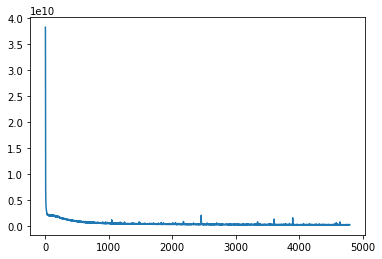

In [20]:
Best score: -1327953115.2328768 Best param:{'batch_size': 48, 'epochs': 4800}
batch_size = 48
epochs = 4800
model_fit(batch_size, epochs, X_train, y_train, X_test)

Cost time: 184.91338324546814 s
RMSE: 26401.939756622247 
LOGRMSE: 0.12033880198053648


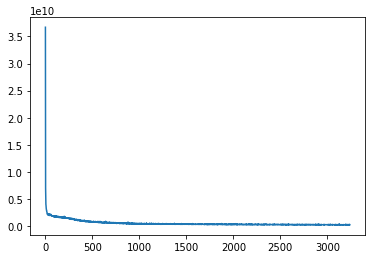

In [21]:
batch_size = 32
epochs = 3240
model_fit(batch_size, epochs, X_train, y_train, X_test)

In [22]:
# model=create_model()
# history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3240,batch_size=32,verbose=0)

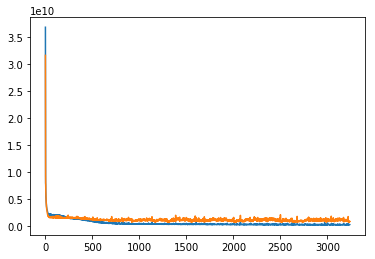

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## 练习二 使用BatchNormalization层

- 使用SGD进行训练

In [12]:
def create_model2():
    model=Sequential()
    model.add(Dense(10,input_dim = X_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(300))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1))
    sgd = optimizers.SGD(lr=0.00000000000001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    return model

In [13]:
def model_fit(batch_size, epochs, X_train, y_train, X_test):
    model = create_model2()

    start_time = time.time()
    history = model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=0)
    end_time = time.time()
    print("Cost time: {} s".format(end_time - start_time))
    benchmark(model,X_test, y_test)
    plt.plot(history.history['loss'])

In [ ]:
batch_size = [32, 48, 64]
epochs = [2000, 3000, 3500, 4000, 4500, 5000]

model = KerasRegressor(build_fn=create_model2)

param_grid = dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=0, cv=5, n_jobs=-1)
result = grid.fit(X_train, y_train)
for mean,stdev,param in zip(result.cv_results_['mean_test_score'],
                           result.cv_results_['std_test_score'],
                           result.cv_results_['params']):
    print("mean:{} stdev:{} param:{}".format(mean,stdev,param))
print("Best score: {} Best param:{}".format(result.best_score_, result.best_params_))

In [54]:
Best score: -1389469387.3561645 Best param:{'batch_size': 32, 'epochs': 3000}
batch_size = 32
epochs = 3000
model_fit(batch_size, epochs, X_train, y_train, X_test)

In [40]:
# 负数没法取log，回归问题对于outlier处理不好？比如说 大家随机分的评测级 包含了全局最大值 那么 如果训练的过拟合 就会预测成为负数；大家可以把benchmark做修改 例如如果是负数让它变为绝对值
# ValueError: Input contains NaN, infinity or a value too large for dtype('float32').
# https://www.zhihu.com/question/49346370
# 梯度爆炸了吧。 我的解决办法一般以下几条： 
# 1、数据归一化（减均值，除方差，或者加入normalization，例如BN、L2 norm等）； 
# 2、更换参数初始化方法（对于CNN，一般用xavier或者msra的初始化方法）； 
# 3、减小学习率、减小batch size； 
# 4、加入gradient clipping；

(array([], dtype=int64),)

## 练习三
- 房价使用log或者以万为单位

In [22]:
y_train_log=np.log(y_train)
y_train_wan=y_train/10000
y_test_log=np.log(y_test)
y_test_wan=y_test/10000

In [71]:
def create_model3():
    model=Sequential()
    model.add(Dense(10,input_dim=X_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(300))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1))
    #sgd = optimizers.SGD(optimizer='adam',loss='mean_squared_error')
    model.compile(optimizer='adam',loss='mean_squared_error')
    return model

In [72]:
model=create_model3()
history=model.fit(X_train,y_train_wan,validation_data=(X_test,y_test_wan),epochs=3000,batch_size=32,verbose=0)

In [74]:
benchmark(model,X_test,y_test_wan)

RMSE: 3.1713150043920235 
LOGRMSE: 0.15695318455036922


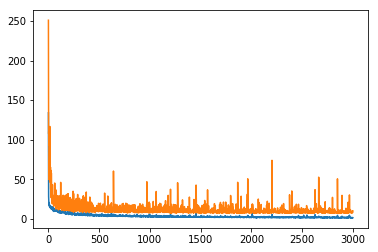

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [76]:
benchmark1(model,X_test,y_test_wan)

RMSE: 182741.57888359908 
LOGRMSE: 9.181887505186484


In [82]:
def grid_search(model_func,X_train,y_train,X_test,y_test,epochs,batch_size,verbose):
    model = model_func()
    for b in batch_size:
        for epoch in epochs:
            print("epoch:{} -- batch_size:{}".format(epoch, b))
            history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epoch,batch_size=b,verbose=verbose)
            benchmark(model,X_test,y_test)
            print("-"*50)

In [83]:
batch_size = [32, 48, 64]
epochs = [2000, 3000, 3500, 4000, 4500, 5000]
grid_search(create_model3,X_train,y_train_wan,X_test,y_test_wan,epochs,batch_size,verbose=0)

epoch:2000 -- batch_size:32
RMSE: 3.148683249895711 
LOGRMSE: 0.14387862978129495
--------------------------------------------------
epoch:3000 -- batch_size:32
RMSE: 2.9782105190041674 
LOGRMSE: 0.13216228688535808
--------------------------------------------------
epoch:3500 -- batch_size:32
RMSE: 2.8241274872097715 
LOGRMSE: 0.14058606656050132
--------------------------------------------------
epoch:4000 -- batch_size:32
RMSE: 3.0642325087552513 
LOGRMSE: 0.14686445004223178
--------------------------------------------------
epoch:4500 -- batch_size:32
RMSE: 2.9697457357404873 
LOGRMSE: 0.1458438013052856
--------------------------------------------------
epoch:5000 -- batch_size:32
RMSE: 3.0053873471214776 
LOGRMSE: 0.1513725833596386
--------------------------------------------------
epoch:2000 -- batch_size:48
RMSE: 2.9449132149116917 
LOGRMSE: 0.14327735072222178
--------------------------------------------------
epoch:3000 -- batch_size:48
RMSE: 2.9386131820195867 
LOGRMSE: 0.

In [85]:
batch_size = [32]
epochs = range(2600,3500,100)
grid_search(create_model3,X_train,y_train_wan,X_test,y_test_wan,epochs,batch_size,verbose=0)

epoch:2600 -- batch_size:32
RMSE: 3.628607526154356 
LOGRMSE: 0.15873669835065618
--------------------------------------------------
epoch:2700 -- batch_size:32
RMSE: 3.3069344676047456 
LOGRMSE: 0.13343433856729756
--------------------------------------------------
epoch:2800 -- batch_size:32
RMSE: 3.0493717786705345 
LOGRMSE: 0.1450162064917259
--------------------------------------------------
epoch:2900 -- batch_size:32
RMSE: 3.2045954003914594 
LOGRMSE: 0.14517843913654196
--------------------------------------------------
epoch:3000 -- batch_size:32
RMSE: 3.1522039155177635 
LOGRMSE: 0.14874941287745705
--------------------------------------------------
epoch:3100 -- batch_size:32
RMSE: 3.142419631445947 
LOGRMSE: 0.14706393231631765
--------------------------------------------------
epoch:3200 -- batch_size:32
RMSE: 3.328734569898689 
LOGRMSE: 0.15448721215517539
--------------------------------------------------
epoch:3300 -- batch_size:32
RMSE: 3.0668851150985326 
LOGRMSE: 0.1

In [94]:
batch_size = [32, 48, 64]
epochs = [2000, 3000, 3500, 4000, 4500, 5000]
grid_search(create_model3,X_train,y_train_log,X_test,y_test_log,epochs,batch_size,verbose=0)

epoch:2000 -- batch_size:32
RMSE: 0.1680311114695571 
LOGRMSE: 0.014029552267969349
--------------------------------------------------
epoch:3000 -- batch_size:32
RMSE: 0.152456641410507 
LOGRMSE: 0.012870390093722987
--------------------------------------------------
epoch:3500 -- batch_size:32
RMSE: 0.15271511579995883 
LOGRMSE: 0.01284778612715501
--------------------------------------------------
epoch:4000 -- batch_size:32
RMSE: 0.14551550594755708 
LOGRMSE: 0.012261974899764409
--------------------------------------------------
epoch:4500 -- batch_size:32
RMSE: 0.1474883008399185 
LOGRMSE: 0.012444982561498657
--------------------------------------------------
epoch:5000 -- batch_size:32
RMSE: 0.15485397045065835 
LOGRMSE: 0.012905463033692919
--------------------------------------------------
epoch:2000 -- batch_size:48
RMSE: 0.14690707087142446 
LOGRMSE: 0.012400911234915423
--------------------------------------------------
epoch:3000 -- batch_size:48
RMSE: 0.1753082726680265 

## 练习四
- 使用RobustScaler()训练

In [24]:
transformer = RobustScaler().fit(X_train)

In [25]:
X_train_norm = transformer.transform(X_train)
X_test_norm = transformer.transform(X_test)

In [26]:
def create_model4():
    model=Sequential()
    model.add(Dense(10,input_dim=X_train.shape[1]))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(300))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1))
    #sgd = optimizers.SGD(optimizer='adam',loss='mean_squared_error')
    model.compile(optimizer='adam',loss='mean_squared_error')
    return model

In [27]:
model = create_model4()

In [28]:
history=model.fit(X_train_norm,y_train_wan,validation_data=(X_test_norm,y_test_wan),epochs=500,batch_size=16,verbose=0)

In [29]:
benchmark(model,X_test_norm, y_test_wan)

RMSE: 3.1386982963940584 
LOGRMSE: 0.17507335932171497


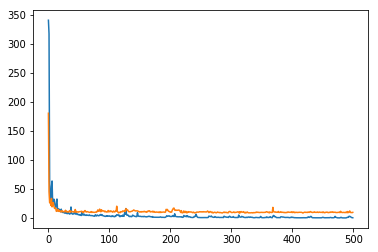

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [89]:
batch_size = [32, 48, 64]
epochs = [2000, 3000, 3500, 4000, 4500, 5000]
grid_search(create_model4,X_train_norm,y_train,X_test_norm,y_test,epochs,batch_size,verbose=0)

# epoch:500 -- batch_size:16
# RMSE: 26913.024802251904 
# LOGRMSE: 0.1355209223695105
# 8,200

epoch:2000 -- batch_size:32
RMSE: 27719.814703165077 
LOGRMSE: 0.1434851712950422
--------------------------------------------------
epoch:3000 -- batch_size:32
RMSE: 39465.673892907645 
LOGRMSE: 0.20832710255632372
--------------------------------------------------
epoch:3500 -- batch_size:32
RMSE: 41297.551120912416 
LOGRMSE: 0.22879263345963388
--------------------------------------------------
epoch:4000 -- batch_size:32
RMSE: 40805.66856282269 
LOGRMSE: 0.2282102118850337
--------------------------------------------------
epoch:4500 -- batch_size:32
RMSE: 39623.786039556835 
LOGRMSE: 0.22035442555048232
--------------------------------------------------
epoch:5000 -- batch_size:32
RMSE: 38820.17197496433 
LOGRMSE: 0.21783686498678137
--------------------------------------------------
epoch:2000 -- batch_size:48
RMSE: 38660.20804576314 
LOGRMSE: 0.21462576251597568
--------------------------------------------------
epoch:3000 -- batch_size:48
RMSE: 38007.93805677153 
LOGRMSE: 0.215

## 练习五
- 尝试将y transform训练之后，再反归一化预测评测

In [39]:
transformer = RobustScaler().fit(X_train)
X_train_norm = transformer.transform(X_train)
X_test_norm = transformer.transform(X_test)

y_train = np.array(y_train).reshape(len(y_train), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)
transformer2 = RobustScaler().fit(y_train)
y_train_norm = transformer2.transform(y_train)
y_test_norm = transformer2.transform(y_test)

In [40]:
# a.flatten()
model = create_model4()

In [41]:
history = model.fit(X_train_norm, y_train_norm.flatten(),
                    validation_data = (X_test_norm, y_test_norm.flatten()), epochs=500, batch_size=16,verbose=0)

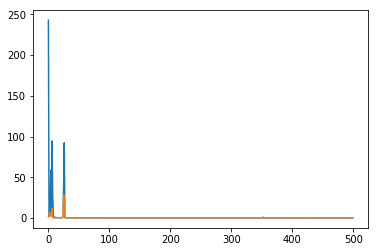

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [51]:
pred = model.predict(X_test_norm)
p = np.array(pred).reshape(len(pred), 1)
pred = transformer2.inverse_transform(p).flatten()

rmse = np.sqrt(mean_squared_error(y_test,pred))
logrmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(pred)))
print("RMSE: {} \nLOGRMSE: {}".format(rmse, logrmse))

RMSE: 37908.876080184025 
LOGRMSE: 0.17970509670019089
